## summary

#### 1) ใช้ค่า mean ในกรณีที่ rating เป็น NaN เพราะ NaN มีไม่มากและใช้ Mean จะไม่ส่งผลต่อการทำนายแบบมีนัยสำคัญ

#### 2) KNN > Linear Regression เพราะ KNN หาเพื่อนบ้านที่ใกล้ที่สุดกับ Test data แต่ Linear Regression เลือกค่า k แล้วหาค่าเฉลี่ยของเพื่อนบ้านเพื่อทำนายค่า y 

#### 3) ปัจจัยที่มีผลกับ rating มากที่สุด Number of review > Unit sold > Current Ver > File size > Price



In [296]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [297]:
warnings.filterwarnings("ignore")

In [298]:
trained_filename = 'ebook_rating.csv'

In [299]:
df = pd.read_csv(trained_filename, encoding = "ISO-8859-1")

### Clean data

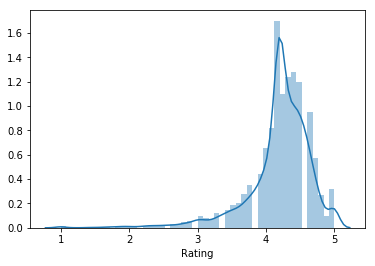

In [300]:
mean_value=df['Rating'].mean()
df['Rating']=df['Rating'].fillna(mean_value)
sns.distplot(df['Rating'])

In [301]:
df['Number of Reviews']=df['Number of Reviews'].fillna(0)
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce').fillna(0).astype(np.int64)
df['File Size'] = df['File Size'].astype('str')
df['File Size'] = df['File Size'].replace('M', ' ', regex=True)
df['File Size'] = df['File Size'].replace('k', ' ', regex=True)
df['File Size'].replace('Varies with device', 0, inplace=True)
df['File Size'] = pd.to_numeric(df['File Size'], errors='coerce').fillna(0).astype(np.int64)
df['Units Sold'] = df['Units Sold'].replace('\+',' ', regex=True).fillna(0)
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce').fillna(0).astype(np.int64)
df['Current Ver'] = df['Current Ver'].astype('str')
df['Current Ver'].replace('Varies with device', 0, inplace=True)
df['Current Ver'] = pd.to_numeric(df['Current Ver'], errors='coerce').fillna(0).astype(np.int64)
df['Price'] = df['Price'].replace('\$', ' ', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(np.int64)
df = df.drop('Book Title',axis=1)
df = df.drop('Last Updated',axis=1)
df = df.drop('Genres',axis=1)
df = df.drop('Content Rating',axis=1)

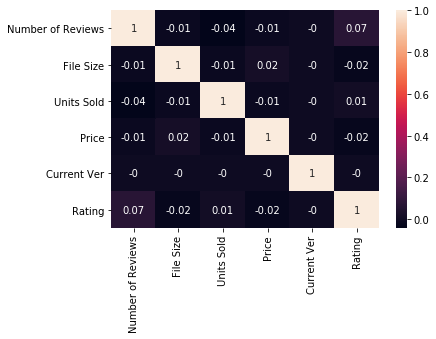

In [302]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [303]:
label = df.Rating
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns=df.keys())
# Join back the data
clean_data = df.join(clean_data_obj)


In [304]:
features = clean_data.dropna().drop('Rating',axis=1)

Text(0, 0.5, 'Rating')

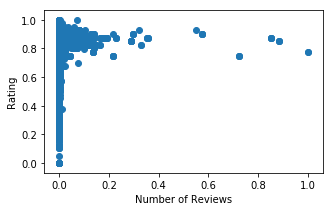

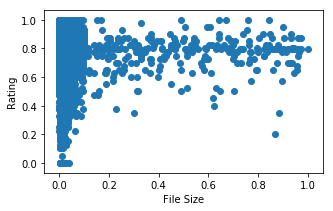

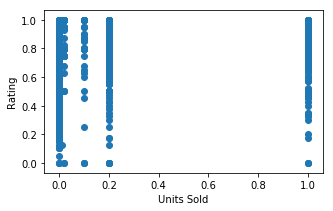

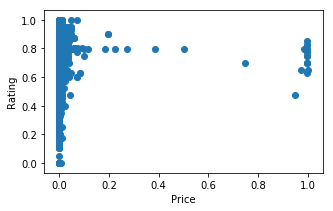

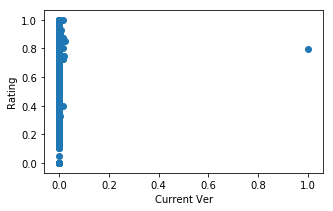

In [306]:
#cols = ['Number of Reviews', 'File Size','Units Sold','Price','Current Ver']
plt.figure(figsize=(5, 3))
x = clean_data['Number of Reviews']
y = clean_data['Rating']
plt.scatter(x, y, marker='o')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')

plt.figure(figsize=(5, 3))
x = clean_data['File Size']
y = clean_data['Rating']
plt.scatter(x, y, marker='o')
plt.xlabel('File Size')
plt.ylabel('Rating')

plt.figure(figsize=(5, 3))
x = clean_data['Units Sold']
y = clean_data['Rating']
plt.scatter(x, y, marker='o')
plt.xlabel('Units Sold')
plt.ylabel('Rating')

plt.figure(figsize=(5, 3))
x = clean_data['Price']
y = clean_data['Rating']
plt.scatter(x, y, marker='o')
plt.xlabel('Price')
plt.ylabel('Rating')

plt.figure(figsize=(5, 3))
x = clean_data['Current Ver']
y = clean_data['Rating']
plt.scatter(x, y, marker='o')
plt.xlabel('Current Ver')
plt.ylabel('Rating')

In [309]:
## select high correration value
X = pd.DataFrame(np.c_[clean_data['Units Sold'], clean_data['Number of Reviews']], columns = ['Units Sold','Number of Reviews'])

In [311]:
train_x,test_x,train_y,test_y = train_test_split(X,label, test_size=0.33, random_state=42)

Text(0.5, 1.0, 'Rating vs Predicted rating')

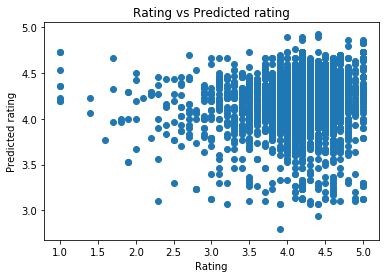

In [312]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_x, train_y)
predictions = neigh.predict(test_x)
plt.scatter(test_y, predictions)
plt.xlabel("Rating")
plt.ylabel("Predicted rating")
plt.title("Rating vs Predicted rating")

In [313]:
rmse = (np.sqrt(mean_squared_error(test_y, predictions)))
r2 = r2_score(test_y, predictions)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.5354980681615017
R2 score is -0.17310146592661058


Text(0.5, 1.0, 'Rating vs Predicted rating')

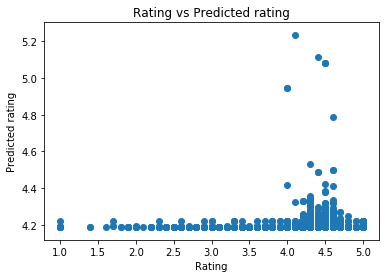

In [314]:
regression_model = LinearRegression()
regression_model.fit(train_x,train_y)
predictions = regression_model.predict(test_x)
plt.scatter(test_y, predictions)
plt.xlabel("Rating")
plt.ylabel("Predicted rating")
plt.title("Rating vs Predicted rating")

In [258]:
rmse = (np.sqrt(mean_squared_error(test_y, predictions)))
r2 = r2_score(test_y, predictions)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 6.72843689776081e-16
R2 score is 1.0
